# Bonus exercise 2 - Transmit an image

In [1]:
# importing libraries.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
from numpy.random import randint

For demonstration purposes we are using XOR, but the algorithm can be replaced with a real symmetrical encryption method.

In [2]:
# "encryption" 
def byte_xor(ba1, ba2):
    return bytes([_a ^ _b for _a, _b in zip(ba1, ba2)])

Alice wants to transmit an image to BOB.

Note: for demostration purpose this image is converted to black/white, but algorithm applies to any image.

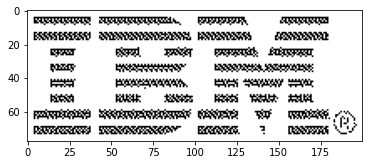

In [3]:
# load the image
fname = r'ibm.jpg'
 
# convert it
image = Image.open(fname).convert("1")
 
# maping image to gray scale
plt.imshow(image, cmap='gray')
plt.show()



First the image has to be converted to bytes for transmission

In [4]:
# create raw data
rawImage = image.tobytes()

First generate the key for Alice

😓 Use QKD instead of simple random key

In [5]:
np.random.seed(seed=25)
keyAlice = randint(2, size=len(rawImage))

Next step is to generate a key for Bob

😓 Use here QKD again

In [6]:
# key generation has been interupted
keyBob = randint(2, size=len(rawImage))

# key is correct
#keyBob = keyAlice

In [8]:
# first encode with the key of alice
encodedRawImage = byte_xor(rawImage, keyAlice)

The encoded image is going to be transmitted by internet, bottle, or homing pigeon. 😁  After Bob receives, he decodes it and converts it back to an image.

In [9]:
# and now decode with the key of Bob
decodedRawImage = byte_xor(encodedRawImage, keyBob)

# load raw data
decocedImage = Image.frombytes(data=decodedRawImage, mode=image.mode, size=image.size)

If the key was not intercepted by Eve, Bob will see the same image as it was sent by Alice. If the key was intercepted and Alice & Bob have a different key, the resulting image is scrambled.  

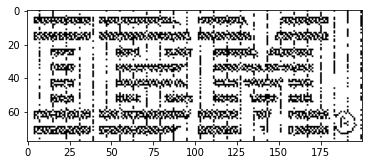

In [10]:
# maping image to gray scale
plt.imshow(decocedImage)
plt.show()